### Estimate the China gdp based on sigmod function

The aim of this experiment is to compute the GDP of China using the sigmoid function and compare the results with a polynomial regression model. The data set for this experiment can be downloaded form this [link](https://www.geekering.com/wp-content/uploads/2021/04/china_gdp_1960.csv)

#### Tools

To work with this experiment, multiple libraries and frameworks need to be installed. The following is a list of them.

- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [scikit-learn](https://scikit-learn.org/stable/)

> Note: If the slope (intercept) is less than 0.7 or the line is curvy, then the system needs a non-linear model. 
The data used contains only one independent variable, the year, and one target variable, the GDP value. 

Let us first sketch the relationship between the year and the value. and according to the slope, the function will select

Text(0.5, 0, 'Year')

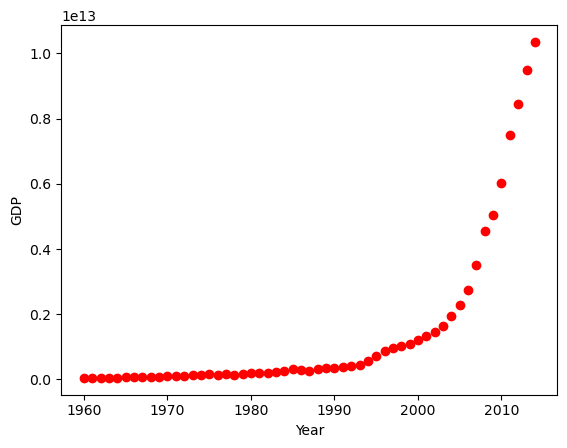

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("dataset.csv")
x, y = (dataset["Year"].values, dataset["Value"].values)
plt.plot(x, y, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')

Non-linear functions can be logarithms, exponentials, ... etc

1- Logarithms $$y = log(x)$$

Text(0.5, 0, 'Independent Variable')

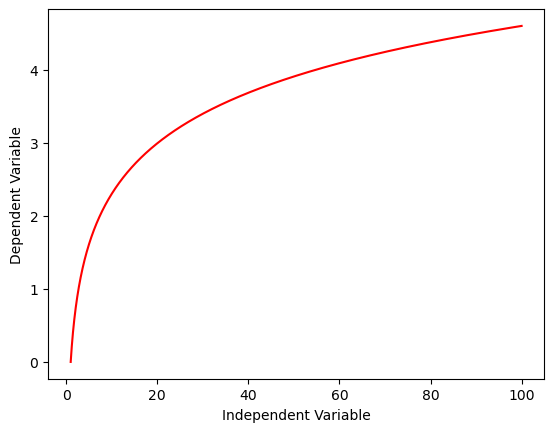

In [16]:
x = np.arange(1, 100, 0.01)
y = np.log(x)
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

2- Quadratic
$$y = x^2 $$

Text(0.5, 0, 'Independent Variable')

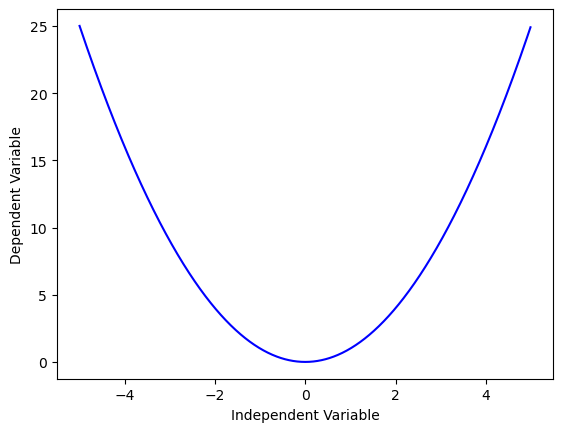

In [27]:
x = np.arange(-5, 5, 0.01)
y = x**2

plt.plot(x, y, 'b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

3- Exponential
$$ y = e^x $$

Text(0.5, 0, 'Independent Variable')

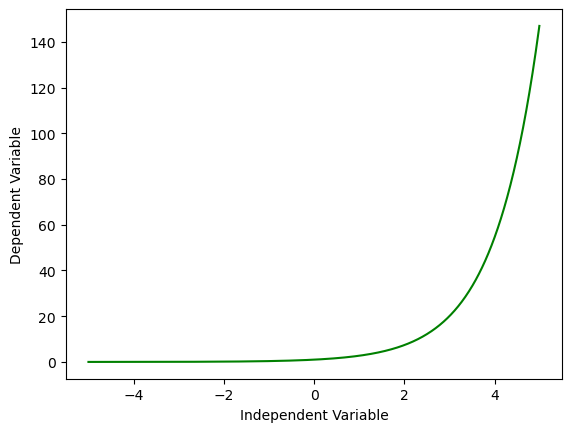

In [29]:
x = np.arange(-5, 5, 0.01)
y = np.exp(x)

plt.plot(x, y, 'g')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

4- Sigmoidal/Logistic
$$ \frac{1}{1+e^{\beta_{1}(x-\beta_{2})}}$$

$$\beta_{1}  Controls the curve’s steepnes $$
$$\beta_{2}  Slides the curve on the x-axis$$

Define a sigmoid function

In [44]:
def sigmoid(x, Beta_1, Beta_2):
      y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
      return y

Normalize our data

In [45]:
x_data, y_data = (dataset["Year"].values, dataset["Value"].values)
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

Split data into train/test

In [64]:
msk = np.random.rand(len(dataset)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

find best betas accouring to the train_x and train_y (x,y) using curve_fit function

In [59]:
from scipy.optimize import curve_fit
betas, pcov = curve_fit(sigmoid, train_x, train_y)
betas

array([686.71406377,   0.99728684])

Compute the Predicted y base on the proposed function

In [66]:
Predicted_y = sigmoid(test_x, *betas)

#### Result

In [67]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(Predicted_y , test_y) )

R2-score: 0.98


Text(0.5, 0, 'Independent Variable')

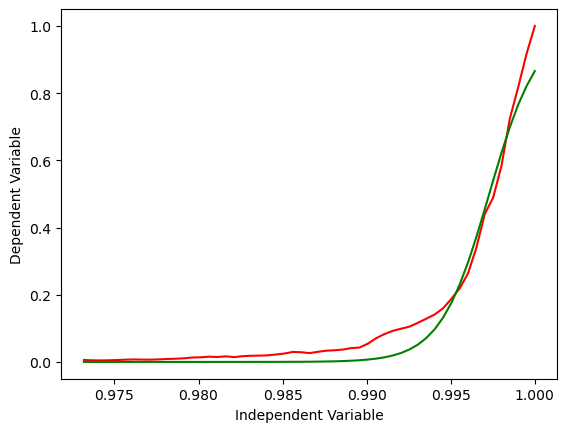

In [69]:
plt.plot(xdata, ydata, 'r')
y = sigmoid(xdata, *betas)
plt.plot(xdata, y, 'g' )
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

#### Polynomial regression

Coefficients:  [[ 0.00000000e+00 -2.45363725e+13  6.20256769e+09]]
Intercept:  [2.42649132e+16]
Mean absolute error: 989078789402.62
Residual sum of squares (MSE): 1288032271814066496864256.00
R2-score: 0.78


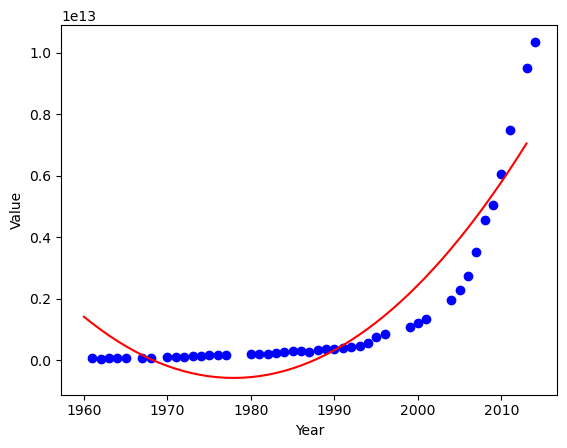

In [71]:
dataset = pd.read_csv('dataset.csv')
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Year']])
train_y = np.asanyarray(train[['Value']])

test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Value']])
poly = PolynomialFeatures(degree=2)

# make the scalling and fed them to poly system
train_x_poly = poly.fit_transform(train_x)

# after convert them linearn using linear to predict 
clf = linear_model.LinearRegression()
predict_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)
plt.scatter(train.Year, train.Value,  color='blue')
XX = np.arange(1960, 2014, 1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Year")
plt.ylabel("Value")

from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)

predict_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,predict_y_ ) )

#### Conclusion

The main objective of this experiment is to develop a model based on the sigmoid function. The obtained result is compared with polynomial regression, and the results show that using a sigmoid is more promising than a polynomial. We achieved 98% accuracy using the sigmoid function and 78% accuracy using Pynomail.